<!-- [![Github](https://img.shields.io/github/stars/labmlai/annotated_deep_learning_paper_implementations?style=social)](https://github.com/labmlai/annotated_deep_learning_paper_implementations)
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/labmlai/annotated_deep_learning_paper_implementations/blob/master/labml_nn/diffusion/ddpm/experiment.ipynb)

## [Denoising Diffusion Probabilistic Models (DDPM)](https://nn.labml.ai/diffusion/ddpm/index.html)

This notebook trains a DDPM based model on MNIST digits dataset. -->

### Install the packages

In [1]:
# !pip install labml-nn --quiet
# !pip install opencv-python


### Imports

In [1]:
import torch
import torch.nn as nn
import numpy as np
import sys
from labml import experiment
from labml.configs import option
from experiment import Configs
from fid import load_images, calculate_fid

seed = 8888
torch.manual_seed(seed)
np.random.seed(seed)

### Create an experiment

In [ ]:
# schedules = ['exp','fixed'] # options: exp, fixed
# learning_models = [ 'CEM','DDPM','SGM'] # options: CEM, DDPM, SGM
schedules = ['exp'] # options: exp, fixed
learning_models = [ 'DDPM','SGM'] # options: CEM, DDPM, SGM
timeIndex = False # options: False, True
for schedule in schedules:
    for learning_model in learning_models:
        if timeIndex:
            file_name = learning_model+'_'+schedule+'_'+'timeIndex'
        else:
            file_name = learning_model+'_'+schedule+'_'+'realTime'
        
        experiment.create(name=file_name, writers={'screen'})
        configs = Configs()
        experiment.configs(configs, {
        'dataset': 'MNIST',
        'image_channels': 1,
        'epochs': 30, #30
        'method': learning_model, # DDPM or CEM or SGM
        'timeIndex': timeIndex, 
        'n_samples': 10000, #10000
        'schedule': schedule
        })
        configs.init()
        experiment.add_pytorch_models({'eps_model': configs.eps_model})
        # Start the experiment
        with experiment.start():
            configs.run()
        with torch.no_grad():
        # Sample an image with an denoising animation
            configs.sample()


/home/zhongjian/diffusion_models/CEM_project/CEM/__init__.py:266: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  eps_theta = self.eps_model(xt, -torch.log(torch.tensor(alpha_bar)).reshape([batch_size,]))
/home/zhongjian/anaconda3/envs/cem_project/lib/python3.11/site-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at /opt/conda/conda-bld/pytorch_1712608853085/work/aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,
/home/zhongjian/anaconda3/envs/cem_project/lib/python3.11/site-packages/torch/autograd/graph.py:744: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descrip

### Start the experiment and run the training loop.

In [2]:
import gzip
seed = 8888
torch.manual_seed(seed)
np.random.seed(seed)

def read_mnist_images(filename):
    with gzip.open(filename, 'rb') as f:
        magic_number = int.from_bytes(f.read(4), 'big')
        num_images = int.from_bytes(f.read(4), 'big')
        num_rows = int.from_bytes(f.read(4), 'big')
        num_cols = int.from_bytes(f.read(4), 'big')
        image_data = np.frombuffer(f.read(), dtype=np.uint8)
        image_data = image_data.reshape(num_images, num_rows, num_cols)
        return image_data


batch_size = 2000
train_images = read_mnist_images('data/MNISTDataset/raw/train-images-idx3-ubyte.gz')
images1 = train_images[np.random.choice(np.arange(60000),size=batch_size)]
del train_images

images2 = np.load('exp_DDPM_mnist_images_generated_realTime.npy')
images2 = images2[0:batch_size]
min_value = np.min(images2)
max_value = np.max(images2)


scaled_data = (images2 - min_value) / (max_value - min_value) * 255


images2 = scaled_data.astype(np.uint8)

images1 = np.stack((images1, images1, images1), axis=-1)
images2 = np.stack((images2, images2, images2), axis=-1)

fid_value = calculate_fid(images1, images2, False, batch_size)

print(fid_value)

/home/zhongjian/anaconda3/envs/cem_project/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/zhongjian/anaconda3/envs/cem_project/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=Inception_V3_Weights.IMAGENET1K_V1`. You can also use `weights=Inception_V3_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


63.635091850704185


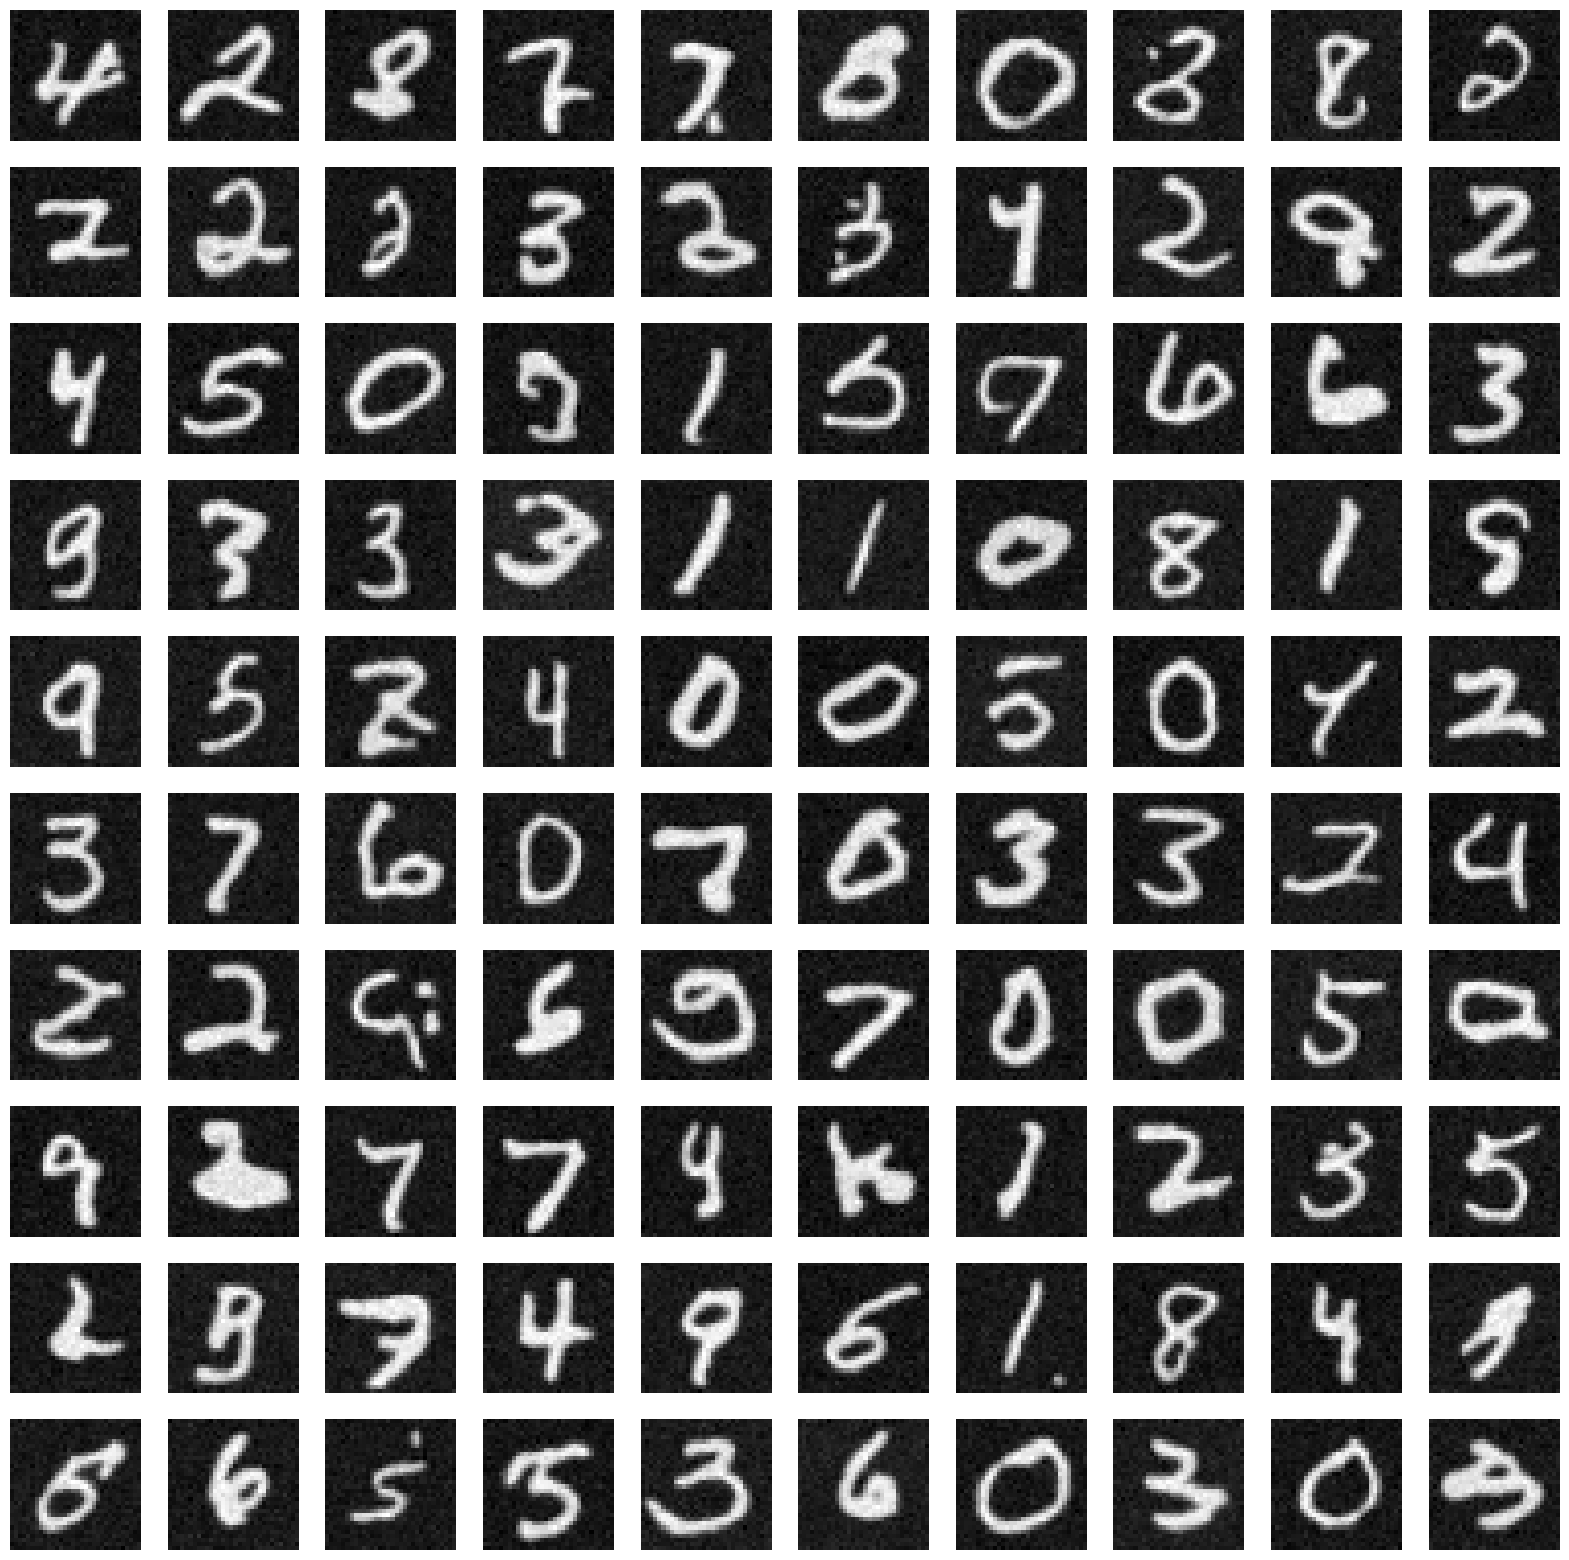

In [3]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

def load_images_from_folder(folder_path):
    images = []
    for filename in os.listdir(folder_path):
        if filename.endswith(".png"):
            img_path = os.path.join(folder_path, filename)
            img = Image.open(img_path)
            images.append(img)
    return images

def display_images(images, rows, cols):
    fig = plt.figure(figsize=(cols*2, rows*2))
    for i in range(len(images)):
        ax = fig.add_subplot(rows, cols, i+1)
        ax.imshow(images[i,:,:],cmap='gray')
        ax.axis('off')
    plt.savefig('ddpm_realTime.png')
    plt.show()



file_path = "exp_DDPM_mnist_images_generated_realTime.npy"

images = np.load(file_path)


N = 10  # raw
M = 10  # column
display_images(images[0:100], N, M)

